In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.width', 70)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows',20)

nls97 = pd.read_csv('data/nls97.csv') # NLS data : 미국 종단 조사(1997-2007)
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate']) # Covid19 data : 국가별 코로나19 확진/사망 데이터

# 데이터 측정
* 데이터 탐색에 앞서 **알고자 하는 것**을 골라내기. 딕셔너리, 코드북 부재로 데이터에 투영된 개체/사건을 실질적으로 이해 못해도 분석가는 데이터를 **재빨리 파악**해야 함


* STEP🔍
 > 1) first look : *데이터 분석 단위가 무엇인가? 즉, 데이터의 행이 어떻게 고유하게 식별되는가?*     
 > 2) selecting columns > 이슈 또는 분석에 관련된 변수에 집중하기 : *왜 A변수에는 x값이 있는데, B변수에는 y값이 있을까?*   
 > 3) selecting rows > 숲(aggregated)과 나무(specific row) 그 중간쯤에서 드러나는 데이터 이슈 감지하기 : *어떤 행들의 부분집합을 살펴봐야할까?*  
 > 4) counts categorical > 범주형 변수의 단방향/양방향 빈도분포(crosstab)  
 > 5) stats continuous > 연속형 변수의 요약통계(statistics), 시각화(histogram)
  
* TIP📍 
        - 식별자를 인덱스로 설정하면, row를 선택하기 쉬워진다 e.g. df.loc[1061] (O) / df.loc[df['personid']==1061] (X) 
        - column 수가 많을 때 전치하면 모든 열을 볼 수 있다 e.g. df.T
        - 상단 행(head) 보다 무작위로 행을 뽑아 보는 것(sample)이 유용할 때도 있다.  
            ⭐df.sample(n, random_state=1) > random_state 쓰면 실행마다 같은 결과
        - 열 선택
            df['열이름'] >  SERIES 반환 
            df[['열이름']] > DATAFRAME 반환
        - 여러 열 선택
            ⭐df.filter(like='검색어') > 검색어가 포함된 칼럼을 반환
            ⭐df.select_dtypes(include=['자료형']) > 자료형에 따라 칼럼 반환 (+ describe(), count_values()에 전달하여 사용)
        - 행 선택
            df[시작인덱스:끝인덱스:간격], df[[n]] > SERIES 반환
            df[n] > DATAFRAME 반환
            ⭐df.loc[bool조건절] > True 행만 반환
        - "우리가 찾으려는 것의 90%는 빈도분포에서 발견할 수 있다." 
            ⭐범주형 변수 > df.value_counts() 
                                       > df.value_counts().plot() 
            ⭐연속형 변수 > df.describe()

# first look

In [2]:
# 1. set index 
nls97.set_index('personid', inplace=True)
nls97.index # view index (n=8984)
nls97.index.nunique() # unique index (n=8984)
nls97.shape # column length (n=8984)
# 2. columns : data type & non-null count
nls97.info() 
# 3. view head data
nls97.head(2).T 

# 1. set index
covidtotals.set_index('iso_code', inplace=True)
covidtotals.index # 내용, 개수
covidtotals.index.nunique() # 종류
covidtotals.shape # 칸수
# 2. columns 
covidtotals.info()
# 3. veiw sample data⭐
covidtotals.sample(2, random_state=1).T 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      6710 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 1

iso_code,COG,THA
lastdate,2020-06-01 00:00:00,2020-06-01 00:00:00
location,Congo,Thailand
total_cases,611,3081
total_deaths,20,57
total_cases_pm,110.727,44.14
total_deaths_pm,3.624,0.817
population,5.51809e+06,6.98e+07
pop_density,15.405,135.132
median_age,19,40.1
gdp_per_capita,4881.41,16277.7


# selecting columns

In [3]:
# 1. dtype : object > category ⭐
#   = df.dtypes 어트리뷰트 
#   + df.select_dtypes(['data type']) 메서드
#   + df.apply(lambda x: function) 메서드
nls97.loc[:, nls97.dtypes=='object'] = nls97.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# 2. select column 
analysisdemo1 = nls97['gender']          # series
analysisdemo2 = nls97[['gender']]        # dataframe
analysisdemo3 = nls97.loc[:, 'gender']   # series
analysisdemo4 = nls97.iloc[:, 0]         # series
analysisdemo5 = nls97.loc[:, ['gender']] # dataframe
analysisdemo6 = nls97.iloc[:, [0]]       # dataframe
type(analysisdemo1), type(analysisdemo2), type(analysisdemo3), type(analysisdemo4), type(analysisdemo5), type(analysisdemo6)

# 3. select columns
analysisdemo = nls97[['gender', 'maritalstatus', 'highestgradecompleted']]
analysisdemo = nls97.loc[:, ['gender', 'maritalstatus', 'highestgradecompleted']]
analysisdemo.shape
analysisdemo.head()

# 4. select columns : creating list of columns
keyvars = ['gender', 'maritalstatus', 'highestgradecompleted', 'wageincome', 'gpaoverall', 'weeksworked17', 'colenroct17']
analysiskeys = nls97[keyvars]
analysiskeys.info()

# 5. select columns : using filter⭐ 
analysiswork = nls97.filter(like='weeksworked') # 칼럼명에 필터링해서 가져오기
analysiswork.info()

# 6. select columns : using select_dtypes⭐
analysiscats = nls97.select_dtypes(include=['category']) # 특정한 데이터 타입의 칼럼 가져오기
analysisnums = nls97.select_dtypes(include=['number'])
analysiscats.info(), analysisnums.info()

# 7. grouping columns
demo = ['personid', 'birthmonth', 'birthyear']
highschoolrecord = ['satverbal', 'satmath', 'gpaoverall']
govresp = ['govprovidejobs', 'govpricecontrols', 'govhealthcare', 'govelderliving', 'govindhelp', 'govunemp','govincomediff', 'govcollegefinance', 
           'govdecenthousing','govprotectenvironment']
demoadult = ['highestgradecompleted', 'maritalstatus', 'childathome','childnotathome', 'wageincome', 'weeklyhrscomputer','weeklyhrstv', 'nightlyhrssleep','highestdegree']
weeksworked = ['weeksworked00', 'weeksworked01','weeksworked02', 'weeksworked03', 'weeksworked04','weeksworked05', 'weeksworked06', 'weeksworked07','weeksworked08', 
               'weeksworked09', 'weeksworked10','weeksworked11', 'weeksworked12', 'weeksworked13','weeksworked14', 'weeksworked15', 'weeksworked16', 'weeksworked17']
colenr = ['colenrfeb97', 'colenroct97', 'colenrfeb98','colenroct98', 'colenrfeb99', 'colenroct99', 'colenrfeb00','colenroct00', 'colenrfeb01', 'colenroct01', 'colenrfeb02',
          'colenroct02', 'colenrfeb03', 'colenroct03', 'colenrfeb04','colenroct04', 'colenrfeb05', 'colenroct05', 'colenrfeb06','colenroct06', 'colenrfeb07', 'colenroct07', 
          'colenrfeb08','colenroct08', 'colenrfeb09', 'colenroct09', 'colenrfeb10','colenroct10', 'colenrfeb11', 'colenroct11', 'colenrfeb12','colenroct12', 'colenrfeb13', 
          'colenroct13', 'colenrfeb14','colenroct14', 'colenrfeb15', 'colenroct15', 'colenrfeb16','colenroct16', 'colenrfeb17', 'colenroct17']

# 8. reorganize columns > dataframe
nls97_new = nls97[demoadult + demo + highschoolrecord + govresp + weeksworked + colenr]
nls97_new.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 8984 non-null   category
 1   maritalstatus          6672 non-null   category
 2   highestgradecompleted  6663 non-null   float64 
 3   wageincome             5091 non-null   float64 
 4   gpaoverall             6004 non-null   float64 
 5   weeksworked17          6670 non-null   float64 
 6   colenroct17            6734 non-null   category
dtypes: category(3), float64(4)
memory usage: 377.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   weeksworked00  8603 non-null   float64
 1   weeksworked01  8564 non-null   float64
 2   weeksworked02  8556 non-null   float64
 3   weeksworked03  8

KeyError: "['personid'] not in index"

# select rows

In [ ]:
# # 1. set_index 
# nls97.set_index('personid', inplace=True)

# 2. select rows : []
nls97[1000:1004]
nls97[1000:1004:2] # 한 칸씩 건너뛰기
nls97[:3] # = nls97.head(3)
nls97[-3:] # = nls97.tail(3)

# 3. select rows : index lable
nls97.loc[[195884, 195891, 195970]] # = nls97.loc[195884:195970]

# 4. select rows: row location
nls97.iloc[0]   # series
nls97.iloc[[0]] # dataframe
nls97.iloc[[0,1,2]] # dataframe, list는 범위로 지정할 수 없다
# nls97.iloc[:3] (O) 
# nls97.iloc[[:3]] (X)
nls97.iloc[[-3, -2, -1]]
# nls97.iloc[-3:] (O)

# 5.select rows : boolean indexing⭐
nls97.nightlyhrssleep.quantile(0.05) # 매우 적은 수면을 취하는 5% : 4시간 이하로 잠을 잔다
nls97.nightlyhrssleep.count() # (n=6706)
sleep_check_bool = nls97.nightlyhrssleep<=4 # bool 조건 생성 
lowsleep = nls97.loc[sleep_check_bool] # loc에 bool 조건 전달
lowsleep.shape # (n=364)

# 6. select rows : combined case
lowsleep.childathome.describe() # 75% 지점 = 3명
lowsleep_3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3)]
lowsleep_3pluschildren.shape # (n=82)

# 7. select rows & columns⭐
lowsleep_3pluschildren = nls97.loc[(nls97.nightlyhrssleep<=4) & (nls97.childathome>=3), ['nightlyhrssleep', 'childathome']]
lowsleep_3pluschildren

# counts categorical🚩

In [200]:
# 1. object > category
nls97.loc[:,nls97.dtypes=='object'] = nls97.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# 2. category : null check
catcols = nls97.select_dtypes(include=['category']).columns
nls97[catcols].isnull().sum()

# 3. 결혼 여부 변수(all case) > 빈도비율⭐
nls97.maritalstatus.value_counts()
nls97.maritalstatus.value_counts(sort=False) 
nls97.maritalstatus.value_counts(sort=False, normalize=True) # 빈도 > 비율

# 4. 정부 책임 변수(all case) > 빈도비율⭐
nls97.filter(like='gov').apply(lambda x: x.value_counts(sort=False, normalize=True))
nls97.filter(like='gov').apply(pd.value_counts, sort=False, normalize=True)

# 5. 정부 책임 변수(married case) > 빈도비율⭐
nls97[nls97.maritalstatus=='Married'].filter(like='gov').apply(pd.value_counts, normalize=True)

# 6. 모든 범주형 컬럼들(all case) > 빈도 및 빈도비율 > 기록 ⭐⭐

freqout = open('views/frequencies.txt', 'w') # 기록할 파일 열기

for col in nls97.select_dtypes(include=['category']):
    print(col, '-----------------', 'frequencies',
         nls97[col].value_counts(sort=False), 'percentages',
         nls97[col].value_counts(normalize=True, sort=False),
         sep='\n\n', end='\n\n\n', file=freqout) # 기록

freqout.close() # 기록한 파일 닫기

# stats continuous🚩

In [6]:
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [234]:
# # 1. set index
# covidtotals.set_index('iso_code', inplace=True)

# 2. data structure
covidtotals.sample(2, random_state=1).T
covidtotals.dtypes

# 3. data descriptive statistics
covidtotals.describe()

,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,210.00,210.00,209.00,209.00,210.00,198.00,186.00,182.00,164.00
mean,"29,216.14","1,770.71","1,361.84",55.93,"36,942,762.36",362.87,30.63,"19,539.15",3.01
std,"136,397.80","8,705.57","2,629.89",145.08,"142,509,205.13","1,581.44",9.13,"19,862.35",2.46
min,0.00,0.00,0.89,0.00,809.00,0.14,15.10,661.24,0.10
25%,175.75,4.00,96.78,0.89,"1,031,042.50",37.42,22.25,"4,485.33",1.30
50%,"1,242.50",25.50,282.00,6.21,"6,909,866.00",87.25,30.25,"13,183.08",2.36
75%,"10,117.00",241.25,"1,803.32",32.16,"26,158,676.50",214.12,39.00,"28,556.53",3.90
max,"1,790,191.00","104,383.00","19,771.35","1,237.55","1,439,323,774.00","19,347.50",48.20,"116,935.60",13.80


In [233]:
# 4. cases, deaths > distribution(detail)
totvars = ['location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']
covidtotals[totvars].quantile(np.arange(0.0, 1.1, 0.1)) # n분위 별 값

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.00,0.00,0.00,0.89,0.00
0.10,22.90,0.00,18.49,0.00
0.20,105.20,2.00,56.74,0.40
0.30,302.00,6.70,118.23,1.73
0.40,762.00,12.00,214.92,3.97
0.50,"1,242.50",25.50,282.00,6.21
0.60,"2,514.60",54.60,546.05,12.56
0.70,"6,959.80",137.20,"1,074.03",26.06
0.80,"16,847.20",323.20,"2,208.74",50.29
0.90,"46,513.10","1,616.90","3,772.00",139.53


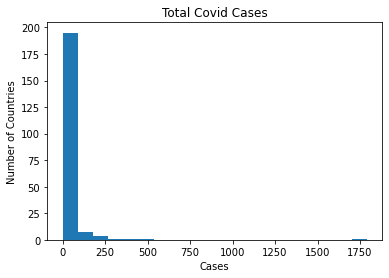

In [232]:
# 5. cases > histogram
plt.hist(covidtotals['total_cases']/1000, bins=20)
plt.title('Total Covid Cases')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()
# 해석 : 총 확진자 수의 분포에 극단적 이상값이 있다. 시각적인 분포는 로그 정규에 가까워 보인다. (꼬리 두꺼움 + 음수값 미존재)